In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
train_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [3]:
train_data.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [4]:
train_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [5]:
train_data = train_data.drop(columns=(['Academic Pressure','CGPA','Study Satisfaction']))


In [6]:
train_data['Profession'] = train_data['Profession'].fillna(train_data['Profession'].mode()[0])

In [7]:
train_data['Work Pressure'] = train_data['Work Pressure'].fillna(train_data['Work Pressure'].median())

In [8]:
train_data['Work Pressure'].value_counts()

Work Pressure
3.0    49817
2.0    24373
4.0    22512
5.0    22436
1.0    21562
Name: count, dtype: int64

In [9]:
train_data['Job Satisfaction'] = train_data['Job Satisfaction'].fillna(train_data['Job Satisfaction'].median())

In [10]:
train_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           4
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         4
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [11]:
train_data = train_data.dropna()

In [12]:
train_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,3.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Teacher,5.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,5.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,3.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,5.0,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [13]:
train_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

**EDA**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Depression', ylabel='count'>

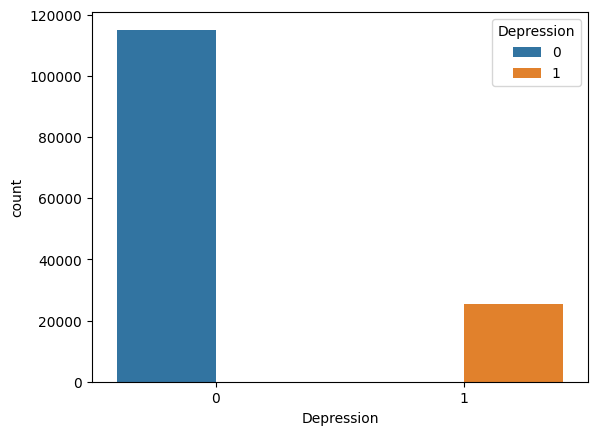

In [15]:
sns.countplot(x='Depression',data=train_data, hue = 'Depression')

<Axes: xlabel='Gender', ylabel='count'>

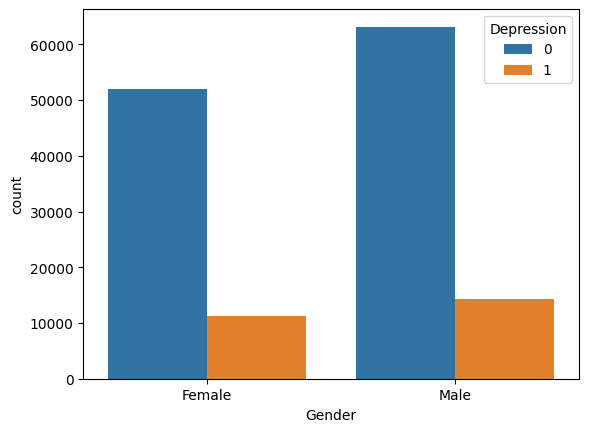

In [16]:
sns.countplot(x='Gender', data=train_data, hue = 'Depression')

<Axes: xlabel='Work Pressure', ylabel='Age'>

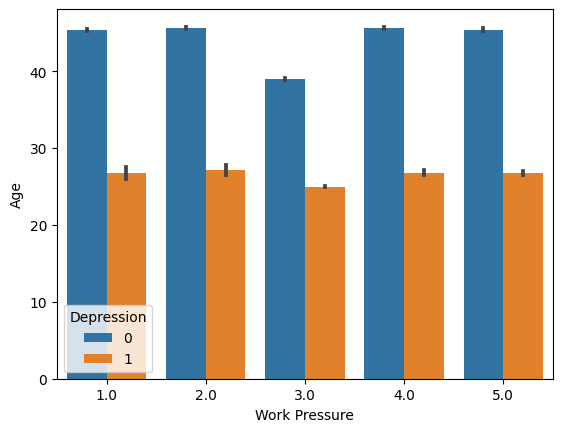

In [17]:
sns.barplot(x='Work Pressure',y='Age',data=train_data, hue='Depression')

Observation: For all levels of work pressure, people who are in depression are from age 25-30

Feature to consider: Age, Work Pressure

<Axes: xlabel='Job Satisfaction', ylabel='Age'>

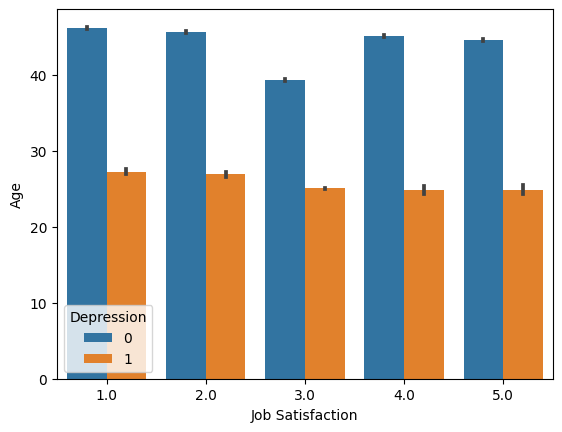

In [18]:
sns.barplot(x='Job Satisfaction', y='Age', data = train_data, hue = 'Depression')

Observation: For all levels of Job Satisfaction, people who are in depression are from age 25-30

Feature to consider: Age, Work Pressure or Job Satisfaction(since Work Pressure and 
Job Satisfaction distributions are almost same by looking at above charts)

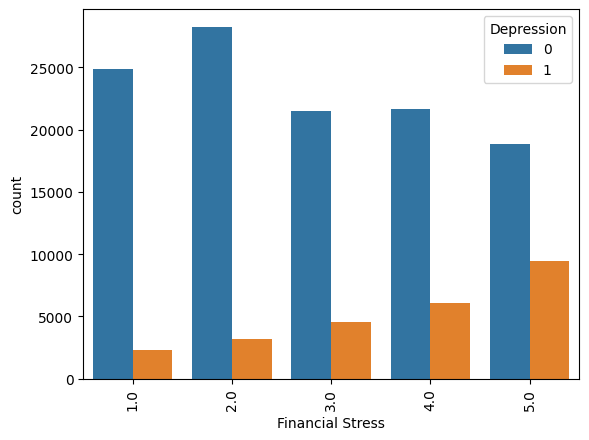

In [19]:
sns.countplot(x='Financial Stress',hue='Depression',data=train_data)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

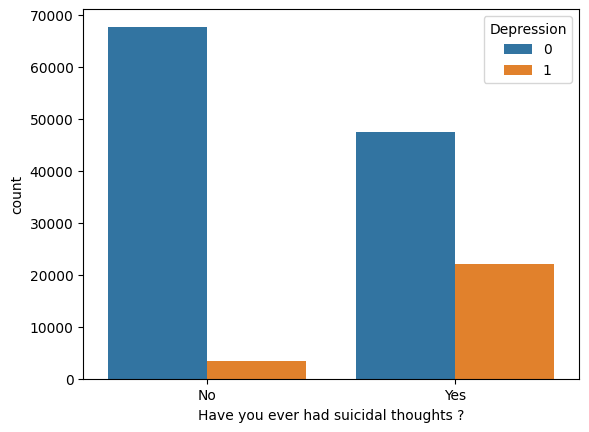

In [20]:
sns.countplot(x='Have you ever had suicidal thoughts ?',data=train_data,hue='Depression')

Observation: People who are in depression had suicidal thoughts
    
Feature to consider: Have you ever had suicidal thoughts ?

<Axes: xlabel='Work/Study Hours', ylabel='count'>

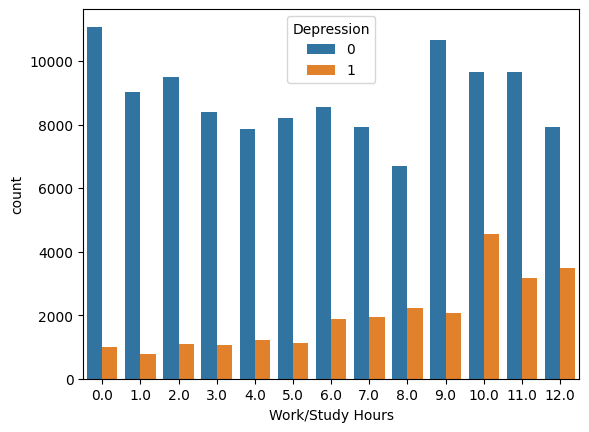

In [21]:
sns.countplot(x='Work/Study Hours',data=train_data,hue='Depression')

Observation: More the work hours, more the depression people 
    
Feature to consider:Work/Study Hours

<Axes: xlabel='Working Professional or Student', ylabel='count'>

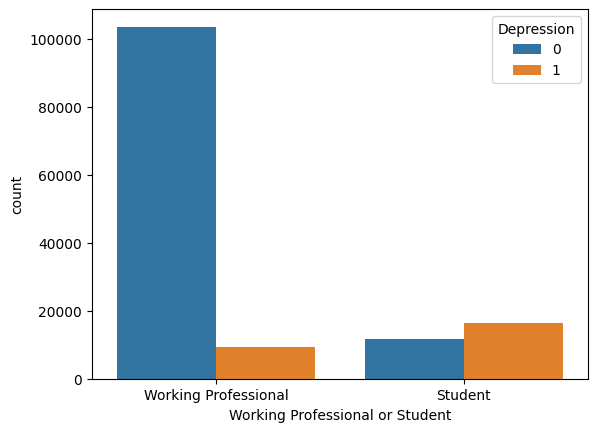

In [22]:
sns.countplot(x='Working Professional or Student',data=train_data,hue='Depression')

Observation: Depression candidates are most students
    
feature to consider: Working Professional or Student

In [23]:
X = train_data[['Work/Study Hours','Have you ever had suicidal thoughts ?','Financial Stress','Age','Work Pressure','Working Professional or Student']]
y = train_data['Depression']

In [24]:
X

,Work/Study Hours,Have you ever had suicidal thoughts ?,Financial Stress,Age,Work Pressure,Working Professional or Student
0,1.0,No,2.0,49.0,5.0,Working Professional
1,7.0,Yes,3.0,26.0,4.0,Working Professional
2,3.0,Yes,1.0,33.0,3.0,Student
3,10.0,Yes,1.0,22.0,5.0,Working Professional
4,9.0,Yes,4.0,30.0,1.0,Working Professional
...,...,...,...,...,...,...
140695,2.0,No,4.0,18.0,5.0,Working Professional
140696,6.0,Yes,5.0,41.0,5.0,Working Professional
140697,4.0,No,4.0,24.0,3.0,Working Professional
140698,10.0,Yes,1.0,49.0,5.0,Working Professional


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [26]:
encoding = LabelEncoder()
features = ['Have you ever had suicidal thoughts ?','Working Professional or Student']
for f in features:
    X[f] = encoding.fit_transform(X[f]) 

/tmp/ipykernel_17/1930062870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f] = encoding.fit_transform(X[f])
/tmp/ipykernel_17/1930062870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f] = encoding.fit_transform(X[f])


In [27]:
X

,Work/Study Hours,Have you ever had suicidal thoughts ?,Financial Stress,Age,Work Pressure,Working Professional or Student
0,1.0,0,2.0,49.0,5.0,1
1,7.0,1,3.0,26.0,4.0,1
2,3.0,1,1.0,33.0,3.0,0
3,10.0,1,1.0,22.0,5.0,1
4,9.0,1,4.0,30.0,1.0,1
...,...,...,...,...,...,...
140695,2.0,0,4.0,18.0,5.0,1
140696,6.0,1,5.0,41.0,5.0,1
140697,4.0,0,4.0,24.0,3.0,1
140698,10.0,1,1.0,49.0,5.0,1


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1000,random_state=10)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((139690, 6), (139690,), (1000, 6), (1000,))

In [29]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=7,max_leaf_nodes=30)

In [30]:
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=30)

In [31]:
model.score(X_test,y_test)

0.899

In [32]:
model.get_depth(),model.get_n_leaves()

(7, 30)

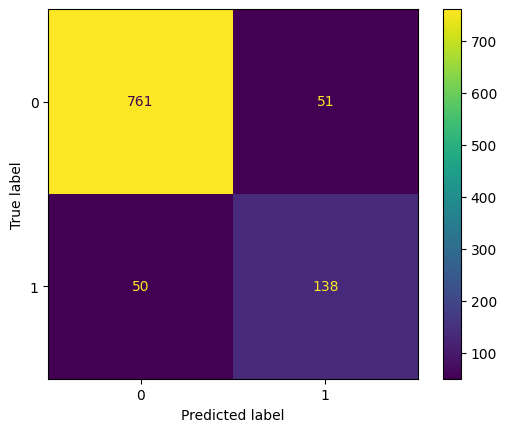

In [33]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier(n_neighbors = 3,weights='distance')

In [36]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.909

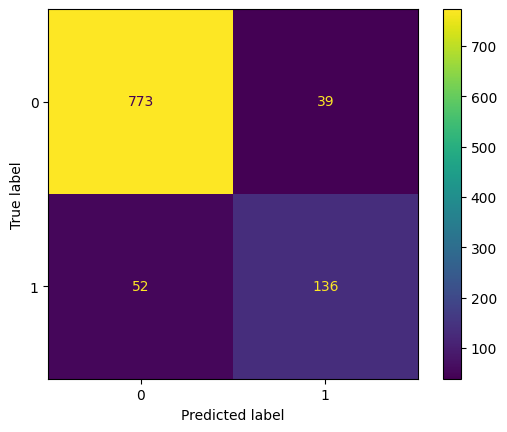

In [37]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [38]:
from sklearn.preprocessing import minmax_scale

In [39]:
X = minmax_scale(X)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=1000)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((139690, 6), (1000, 6), (139690,), (1000,))

In [41]:
model = KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.908

In [42]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [43]:
test_data_input = test_data[['Work/Study Hours','Have you ever had suicidal thoughts ?','Financial Stress','Age','Work Pressure','Working Professional or Student']]

In [44]:
test_data_input

,Work/Study Hours,Have you ever had suicidal thoughts ?,Financial Stress,Age,Work Pressure,Working Professional or Student
0,9.0,No,3.0,53.0,2.0,Working Professional
1,6.0,No,4.0,58.0,2.0,Working Professional
2,12.0,Yes,4.0,53.0,4.0,Working Professional
3,10.0,Yes,4.0,23.0,NaN,Student
4,3.0,Yes,4.0,47.0,5.0,Working Professional
...,...,...,...,...,...,...
93795,2.0,Yes,2.0,49.0,3.0,Working Professional
93796,11.0,Yes,3.0,29.0,5.0,Working Professional
93797,7.0,No,1.0,24.0,NaN,Student
93798,7.0,Yes,5.0,23.0,4.0,Working Professional


In [45]:
cat_features = ['Have you ever had suicidal thoughts ?','Working Professional or Student']

encoding = LabelEncoder()
for f in cat_features:
    test_data_input[f] = encoding.fit_transform(test_data_input[f])

/tmp/ipykernel_17/3707324480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_input[f] = encoding.fit_transform(test_data_input[f])
/tmp/ipykernel_17/3707324480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_input[f] = encoding.fit_transform(test_data_input[f])


In [46]:
test_data_input

,Work/Study Hours,Have you ever had suicidal thoughts ?,Financial Stress,Age,Work Pressure,Working Professional or Student
0,9.0,0,3.0,53.0,2.0,1
1,6.0,0,4.0,58.0,2.0,1
2,12.0,1,4.0,53.0,4.0,1
3,10.0,1,4.0,23.0,NaN,0
4,3.0,1,4.0,47.0,5.0,1
...,...,...,...,...,...,...
93795,2.0,1,2.0,49.0,3.0,1
93796,11.0,1,3.0,29.0,5.0,1
93797,7.0,0,1.0,24.0,NaN,0
93798,7.0,1,5.0,23.0,4.0,1


In [47]:
test_data_input['Work Pressure'] = test_data_input['Work Pressure'].fillna(test_data_input['Work Pressure'].median())

/tmp/ipykernel_17/1893735758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_input['Work Pressure'] = test_data_input['Work Pressure'].fillna(test_data_input['Work Pressure'].median())


In [48]:
test_data_input

,Work/Study Hours,Have you ever had suicidal thoughts ?,Financial Stress,Age,Work Pressure,Working Professional or Student
0,9.0,0,3.0,53.0,2.0,1
1,6.0,0,4.0,58.0,2.0,1
2,12.0,1,4.0,53.0,4.0,1
3,10.0,1,4.0,23.0,3.0,0
4,3.0,1,4.0,47.0,5.0,1
...,...,...,...,...,...,...
93795,2.0,1,2.0,49.0,3.0,1
93796,11.0,1,3.0,29.0,5.0,1
93797,7.0,0,1.0,24.0,3.0,0
93798,7.0,1,5.0,23.0,4.0,1


In [49]:
test_data_input = minmax_scale(test_data_input)

In [50]:
test_data_input

array([[0.75      , 0.        , 0.5       , 0.83333333, 0.25      ,
        1.        ],
       [0.5       , 0.        , 0.75      , 0.95238095, 0.25      ,
        1.        ],
       [1.        , 1.        , 0.75      , 0.83333333, 0.75      ,
        1.        ],
       ...,
       [0.58333333, 0.        , 0.        , 0.14285714, 0.5       ,
        0.        ],
       [0.58333333, 1.        , 1.        , 0.11904762, 0.75      ,
        1.        ],
       [0.91666667, 0.        , 0.25      , 0.5952381 , 1.        ,
        1.        ]])

In [51]:
test_predictions = model.predict(test_data_input)

In [52]:
result_df = pd.DataFrame({
    'id': test_data['id'],  # Extract IDs from the original DataFrame
    'Depression': test_predictions
})

# Save to Excel
result_df.to_csv('/kaggle/working/submission.csv', index=False)


In [53]:
sub = pd.read_csv("/kaggle/working/submission.csv")

In [54]:
sub.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [55]:
!pip install gitpython


In [56]:
!git clone https://github.com/NavyaTrilok/kaggle-test.git


Cloning into 'kaggle-test'...
fatal: unable to access 'https://github.com/NavyaTrilok/kaggle-test.git/': Could not resolve host: github.com


In [57]:
!git config --global user.name "NavyaTrilok"
!git config --global user.email "dtriloknavya@gmail.com"


In [58]:
!git init


Initialized empty Git repository in /kaggle/working/.git/


In [59]:
!git remote add origin https://github.com/NavyaTrilok/kaggle-test.git


In [60]:
!git add .
!git commit -m "Add Kaggle notebook"
!git push -u origin master


[master (root-commit) bff3302] Add Kaggle notebook
 2 files changed, 97799 insertions(+)
 create mode 100644 __notebook__.ipynb
 create mode 100644 submission.csv
fatal: unable to access 'https://github.com/NavyaTrilok/kaggle-test.git/': Could not resolve host: github.com


In [61]:
!git branch -m master


In [62]:
!git push --set-upstream origin main


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/NavyaTrilok/kaggle-test.git'


In [63]:
!git push -u origin main


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/NavyaTrilok/kaggle-test.git'
